In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db = pd.read_csv('3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv')
db['Recidivism - Return to Prison numeric'].value_counts()

0    17339
1     8681
Name: Recidivism - Return to Prison numeric, dtype: int64

In [3]:
#db["Race - Ethnicity"].value_counts()
etnia_motivo = pd.crosstab(db["Race - Ethnicity"], db["Convicting Offense Subtype"], normalize=True)*100
k = etnia_motivo.sum().sort_values(ascending=False)

In [4]:
#zero = pd.crosstab(db[db["Recidivism - Return to Prison numeric"]==0])
db

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,White - Hispanic,25-34,C Felony,Violent,Murder/Manslaughter,NaN,Discharged End of Sentence,Discharged End of Sentence,Yes,0
26016,2015,2018,White - Non-Hispanic,25-34,D Felony,Property,Vandalism,5JD,Paroled to Detainer - Out of State,Paroled to Detainer,No,0
26017,2015,2018,Black - Non-Hispanic,Under 25,Aggravated Misdemeanor,Violent,Other Violent,1JD,Discharged End of Sentence,Discharged End of Sentence,Yes,0
26018,2015,2018,White - Non-Hispanic,Under 25,D Felony,Drug,Other Drug,5JD,Parole,Parole,No,0


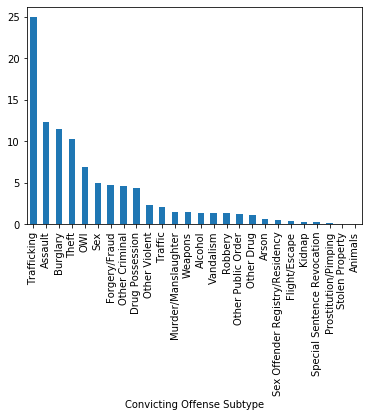

In [5]:
k.plot(kind='bar', legend=False)

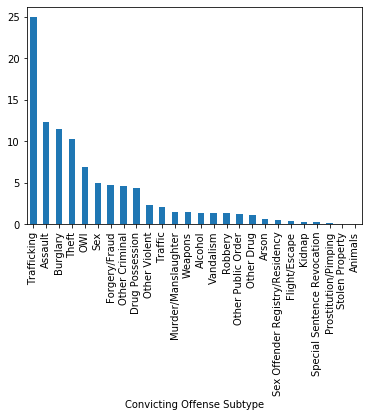

In [6]:
k.plot(kind='bar', by="Recidivism - Return to Prison numeric")

In [36]:
def exploratoria (data,compara, num=[], cat=[]):
    d0=data[data[compara]==0]
    d1=data[data[compara]==1]
    cros={}
    cros_norm={}
    box={}
    for c in cat:
        print(pd.crosstab(data[c],data[compara],normalize='index'))
        print(pd.crosstab(data[c],data[compara]))
        cros[c] = pd.crosstab(data[c],data[compara])
        cros_norm[c] = pd.crosstab(data[c],data[compara],normalize='index')
        print ('nao reincide')
        d0[c].hist(density=True,xrot=45)
        plt.show()
        print ('reincide')
        d1[c].hist(density=True,xrot=45)
        plt.show()
    for n in num:
        plt.figure()
        data.boxplot(column = [n], by = compara)
        box[c]=data.boxplot(column = [n], by = compara)
    return{'crosstab':cros,'boxplot':box,'normed': cros_norm}
        
    

Recidivism - Return to Prison numeric         0         1
Fiscal Year Released                                     
2010                                   0.696717  0.303283
2011                                   0.703344  0.296656
2012                                   0.681435  0.318565
2013                                   0.657563  0.342437
2014                                   0.646097  0.353903
2015                                   0.621856  0.378144
Recidivism - Return to Prison numeric     0     1
Fiscal Year Released                             
2010                                   2589  1127
2011                                   2755  1162
2012                                   3230  1510
2013                                   3082  1605
2014                                   2963  1623
2015                                   2720  1654
nao reincide


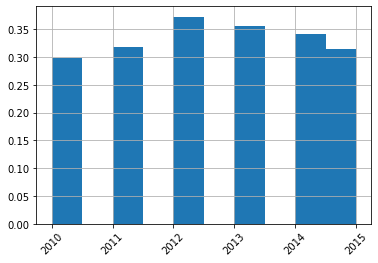

reincide


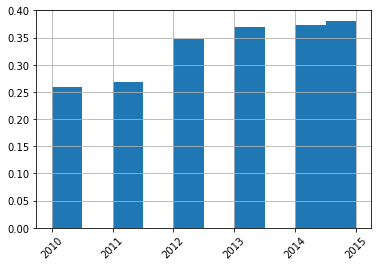

Recidivism - Return to Prison numeric         0         1
Recidivism Reporting Year                                
2013                                   0.696717  0.303283
2014                                   0.703344  0.296656
2015                                   0.681435  0.318565
2016                                   0.657563  0.342437
2017                                   0.646097  0.353903
2018                                   0.621856  0.378144
Recidivism - Return to Prison numeric     0     1
Recidivism Reporting Year                        
2013                                   2589  1127
2014                                   2755  1162
2015                                   3230  1510
2016                                   3082  1605
2017                                   2963  1623
2018                                   2720  1654
nao reincide


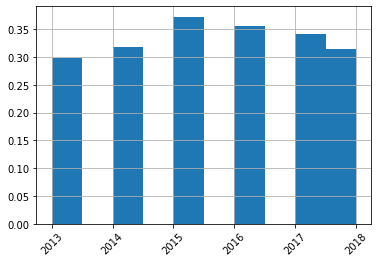

reincide


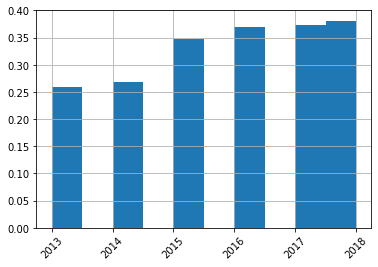

Recidivism - Return to Prison numeric                   0         1
Race - Ethnicity                                                   
American Indian or Alaska Native - Hispanic      0.700000  0.300000
American Indian or Alaska Native - Non-Hispanic  0.603586  0.396414
Asian or Pacific Islander - Hispanic             0.600000  0.400000
Asian or Pacific Islander - Non-Hispanic         0.770833  0.229167
Black -                                          1.000000  0.000000
Black - Hispanic                                 0.702703  0.297297
Black - Non-Hispanic                             0.665739  0.334261
N/A -                                            1.000000  0.000000
White -                                          0.916667  0.083333
White - Hispanic                                 0.785151  0.214849
White - Non-Hispanic                             0.655994  0.344006
Recidivism - Return to Prison numeric                0     1
Race - Ethnicity                                       

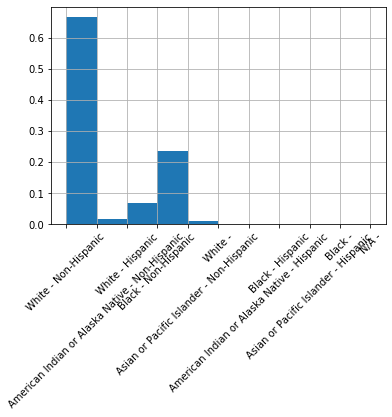

reincide


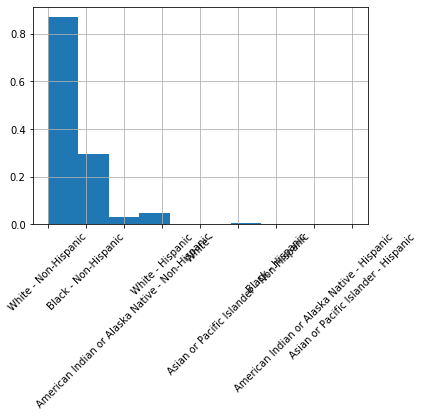

Recidivism - Return to Prison numeric            0         1
Convicting Offense Classification                           
A Felony                                  1.000000  0.000000
Aggravated Misdemeanor                    0.668154  0.331846
B Felony                                  0.667989  0.332011
C Felony                                  0.649125  0.350875
D Felony                                  0.688567  0.311433
Felony - Enhanced                         0.650000  0.350000
Felony - Enhancement to Original Penalty  0.590346  0.409654
Felony - Mandatory Minimum                0.727273  0.272727
Other Felony                              0.500000  0.500000
Other Felony (Old Code)                   1.000000  0.000000
Other Misdemeanor                         1.000000  0.000000
Serious Misdemeanor                       0.703226  0.296774
Sexual Predator Community Supervision     1.000000  0.000000
Simple Misdemeanor                        1.000000  0.000000
Special Sentence 2005   

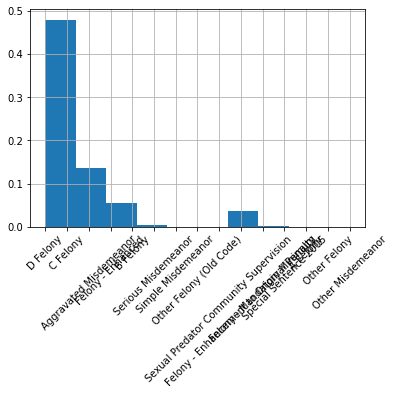

reincide


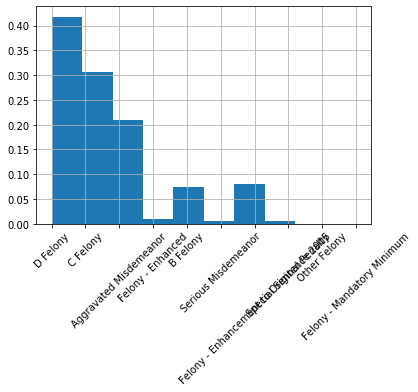

Recidivism - Return to Prison numeric         0         1
Convicting Offense Type                                  
Drug                                   0.640935  0.359065
Other                                  0.565649  0.434351
Property                               0.639669  0.360331
Public Order                           0.706763  0.293237
Violent                                0.732462  0.267538
Recidivism - Return to Prison numeric     0     1
Convicting Offense Type                          
Drug                                   5073  2842
Other                                   741   569
Property                               4715  2656
Public Order                           2550  1058
Violent                                4260  1556
nao reincide


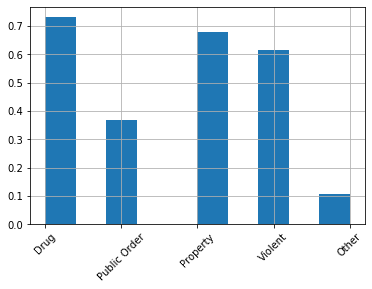

reincide


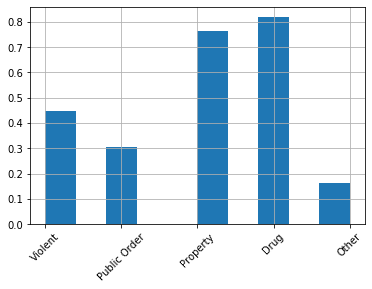

Recidivism - Return to Prison numeric         0         1
Convicting Offense Subtype                               
Alcohol                                0.623596  0.376404
Animals                                0.857143  0.142857
Arson                                  0.739130  0.260870
Assault                                0.725933  0.274067
Burglary                               0.618212  0.381788
Drug Possession                        0.637478  0.362522
Flight/Escape                          0.535714  0.464286
Forgery/Fraud                          0.638544  0.361456
Kidnap                                 0.878788  0.121212
Murder/Manslaughter                    0.845178  0.154822
OWI                                    0.748326  0.251674
Other Criminal                         0.562552  0.437448
Other Drug                             0.697509  0.302491
Other Public Order                     0.636656  0.363344
Other Violent                          0.717138  0.282862
Prostitution/P

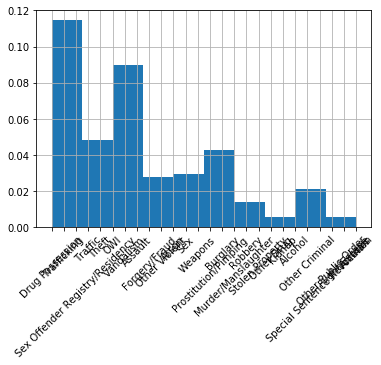

reincide


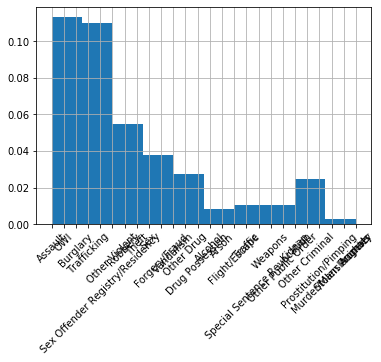

Recidivism - Return to Prison numeric         0         1
Main Supervising District                                
1JD                                    0.590958  0.409042
2JD                                    0.586519  0.413481
3JD                                    0.579966  0.420034
4JD                                    0.544228  0.455772
5JD                                    0.550783  0.449217
6JD                                    0.611111  0.388889
7JD                                    0.649934  0.350066
8JD                                    0.614396  0.385604
ISC                                    0.891429  0.108571
Interstate Compact                     0.886731  0.113269
Recidivism - Return to Prison numeric     0     1
Main Supervising District                        
1JD                                    1647  1140
2JD                                    1166   822
3JD                                     689   499
4JD                                     363   304
5JD 

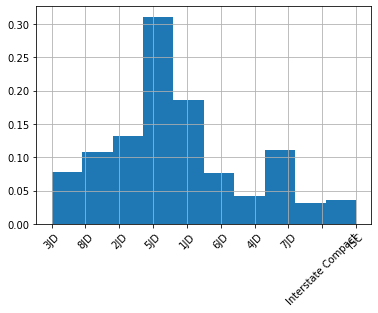

reincide


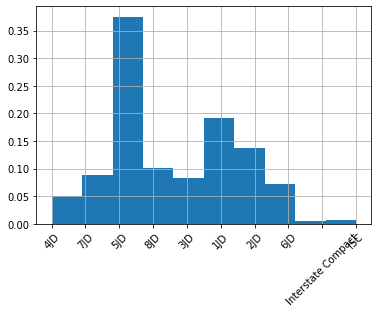

Recidivism - Return to Prison numeric         0         1
Release Type                                             
Discharged End of Sentence             0.746949  0.253051
Interstate Compact Parole              1.000000  0.000000
Parole                                 0.619172  0.380828
Paroled to Detainer - INS              0.970149  0.029851
Paroled to Detainer - Iowa             0.424242  0.575758
Paroled to Detainer - Out of State     0.686131  0.313869
Paroled to Detainer - U.S. Marshall    0.935065  0.064935
Special Sentence                       0.481283  0.518717
Recidivism - Return to Prison numeric     0     1
Release Type                                     
Discharged End of Sentence             5508  1866
Interstate Compact Parole                 1     0
Parole                                 9734  5987
Paroled to Detainer - INS               130     4
Paroled to Detainer - Iowa               28    38
Paroled to Detainer - Out of State       94    43
Paroled to Detainer 

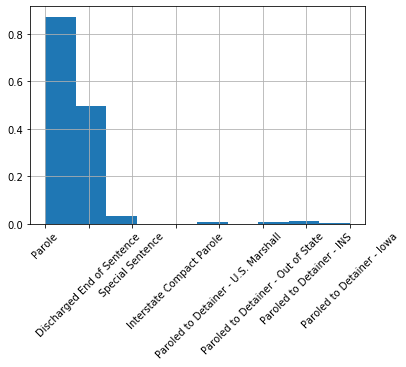

reincide


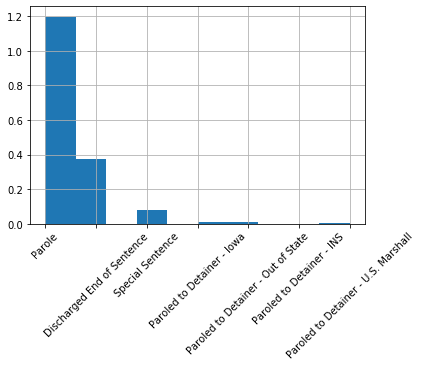

Recidivism - Return to Prison numeric             0         1
Release type: Paroled to Detainder united                    
Discharged End of Sentence                 0.746949  0.253051
Parole                                     0.619196  0.380804
Paroled to Detainer                        0.782609  0.217391
Special Sentence                           0.481283  0.518717
Recidivism - Return to Prison numeric         0     1
Release type: Paroled to Detainder united            
Discharged End of Sentence                 5508  1866
Parole                                     9735  5987
Paroled to Detainer                         324    90
Special Sentence                            360   388
nao reincide


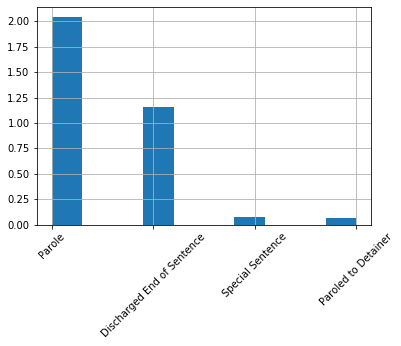

reincide


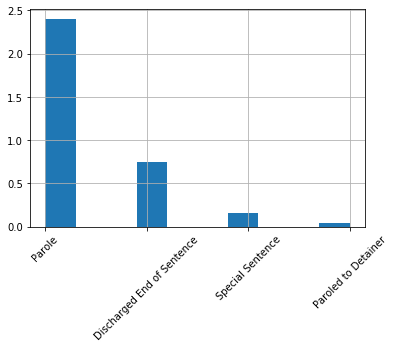

Recidivism - Return to Prison numeric         0         1
Part of Target Population                                
No                                     0.730121  0.269879
Yes                                    0.613913  0.386087
Recidivism - Return to Prison numeric     0     1
Part of Target Population                        
No                                     8576  3170
Yes                                    8763  5511
nao reincide


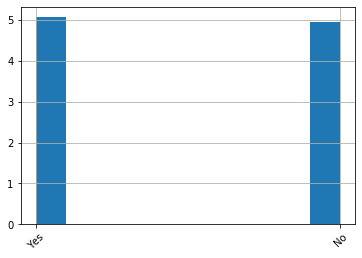

reincide


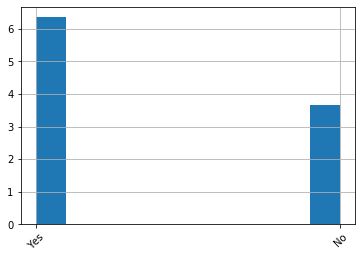

<Figure size 432x288 with 0 Axes>

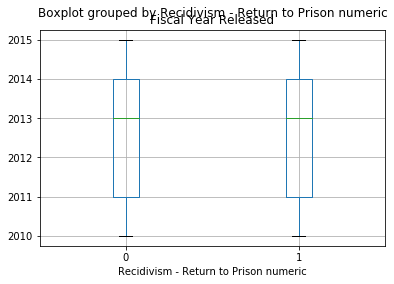

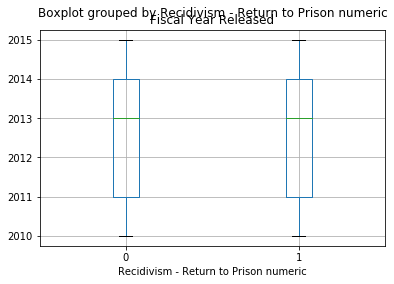

<Figure size 432x288 with 0 Axes>

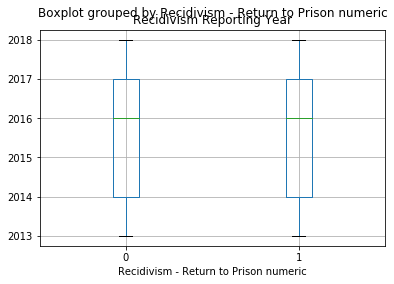

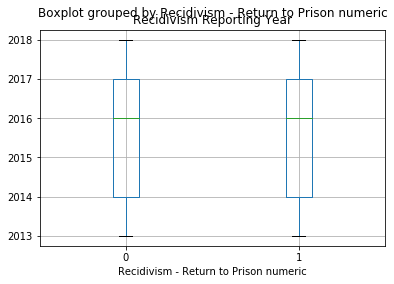

In [37]:
explora=exploratoria(db,'Recidivism - Return to Prison numeric',num=['Fiscal Year Released','Recidivism Reporting Year'],cat=['Fiscal Year Released','Recidivism Reporting Year','Race - Ethnicity','Convicting Offense Classification','Convicting Offense Type','Convicting Offense Subtype','Main Supervising District','Release Type','Release type: Paroled to Detainder united','Part of Target Population'])
#'Age At Release' nao funciona

In [15]:
plt.figure()
explora['hist_0']['Fiscal Year Released']


<Figure size 432x288 with 0 Axes>

In [ ]:
def exploratoria (data,compara, num=[], cat=[]):